## **Heart Failure E2E ML Prediction**

## Problem Statement
Predict whether a patient is at risk of heart failure using clinical data, and identify the most critical medical factors influencing the risk. The goal is to help clinicians prioritize high-risk patients.

### End-to-End Clinical Risk Predictor with 94% AUC & 95% Recall  

**Author:** Abdul Qadir
**Program:** B.S. Applied AI & Data Science  
**Institute:** Indian Institute of Technology Jodhpur (IIT Jodhpur)  
**Semester:** 2nd Semester (2025–2026)  
**Date:** December 2025  
**LinkedIn:** [linkedin.com/in/yourprofile  ](https://www.linkedin.com/in/abdul-qadir-533827318/) \
**GitHub:** https://github.com/Abdulqadir05  

**Key Achievements in this Project:**  
- Achieved **95% Recall** — critical for not missing high-risk patients  
- Identified **Asymptomatic (ASY) chest pain** as the deadliest pattern (~80% disease rate)  
- Production-ready pipeline with Optuna tuning + model export  
- Gender bias analysis & clinical interpretability focus  

> **"Built by a 2nd semester IIT Jodhpur student — proving healthcare AI has no age limit"**  

**Tech Stack:** Python • Pandas • Scikit-learn • GradiantBoosting • Optuna • Seaborn • Matplotlib • Streamlit (coming soon)  
**Domain:** Healthcare AI • Clinical Decision Support • Predictive Modeling  

In [196]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')

In [197]:
# Dataset Load
df = pd.read_csv('heart.csv')
print('Dataset successfully loaded !')

Dataset successfully loaded !


## Exploratory Data Analysis (EDA)

In [198]:
print(df.head()) # first few header check

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [199]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [200]:
print(df.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [201]:
print(df.shape)

(918, 12)


In [202]:
print(df.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [203]:
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [204]:
print(df.isnull().sum() / len(df) * 100)

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64


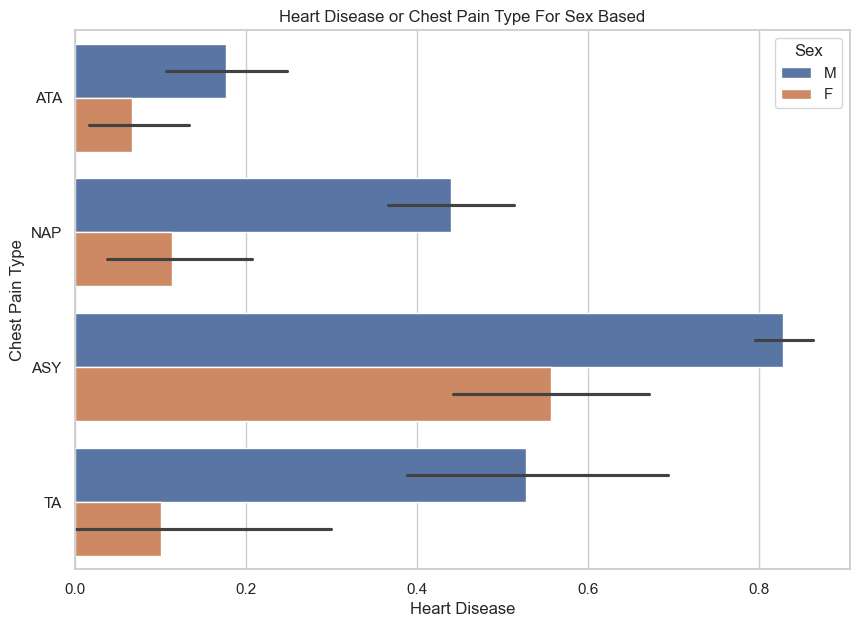

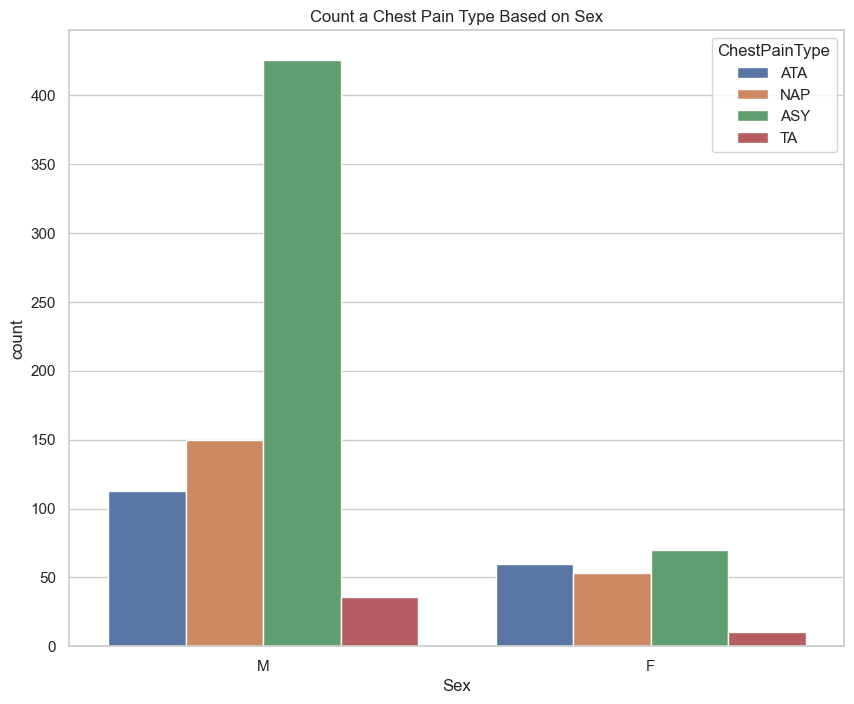

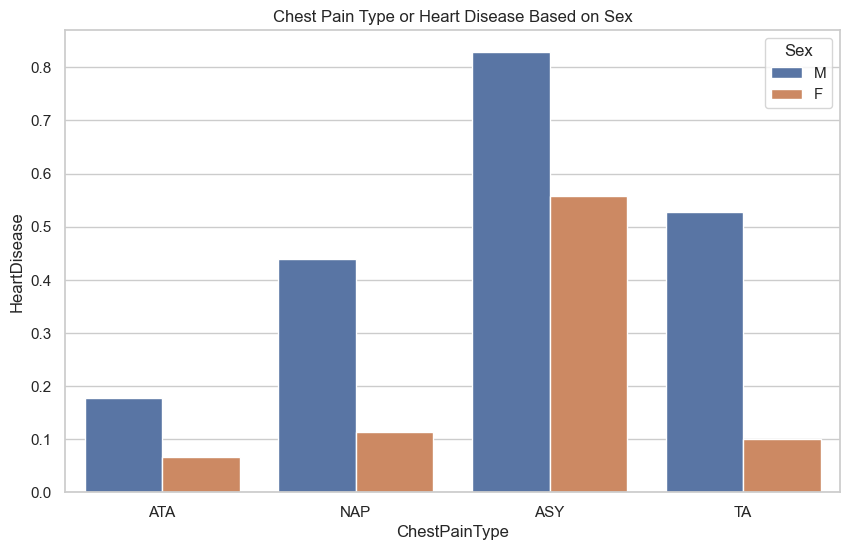

              HeartDisease       Age     MaxHR  FastingBS  Cholesterol
HeartDisease      1.000000  0.282039 -0.400421   0.267291    -0.232741
Age               0.282039  1.000000 -0.382045   0.198039    -0.095282
MaxHR            -0.400421 -0.382045  1.000000  -0.131438     0.235792
FastingBS         0.267291  0.198039 -0.131438   1.000000    -0.260974
Cholesterol      -0.232741 -0.095282  0.235792  -0.260974     1.000000


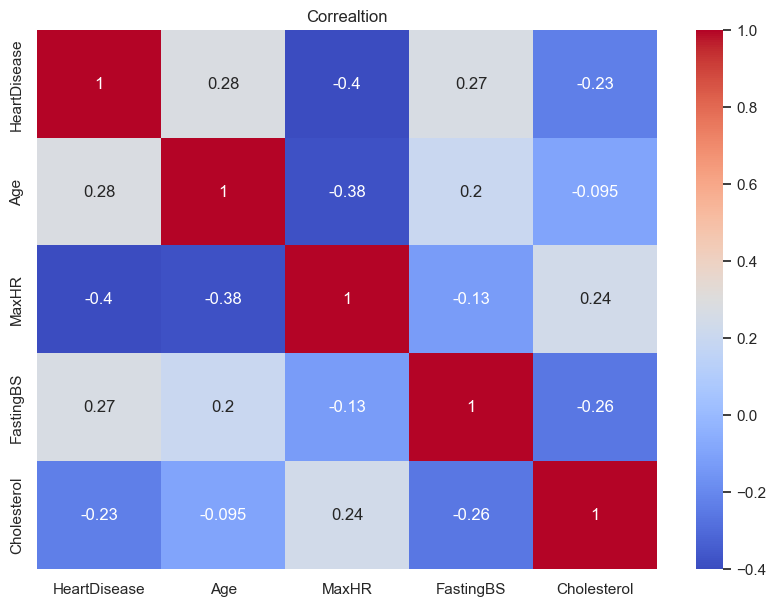

In [205]:
plt.figure(figsize=(10,7))
sns.barplot(x='HeartDisease', y='ChestPainType', hue='Sex',data=df)
plt.title('Heart Disease or Chest Pain Type For Sex Based')
plt.xlabel('Heart Disease')
plt.ylabel('Chest Pain Type')
plt.show()

plt.figure(figsize=(10,8))
sns.countplot(x='Sex' , hue='ChestPainType', data=df)
plt.title('Count a Chest Pain Type Based on Sex')
plt.xlabel('Sex')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='ChestPainType', y='HeartDisease', hue='Sex', data=df, errorbar=None)
plt.title('Chest Pain Type or Heart Disease Based on Sex')
plt.show()

correlation = df[['HeartDisease', 'Age','MaxHR','FastingBS','Cholesterol']].corr()
print(correlation)

plt.figure(figsize=(10,7))
sns.heatmap(correlation , annot=True , cmap='coolwarm')
plt.title('Correaltion')
plt.show()

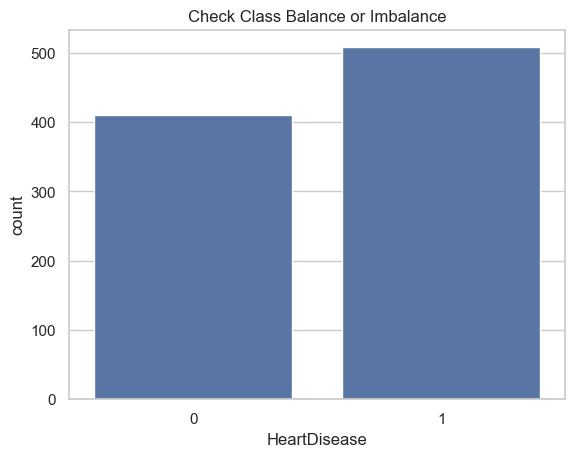

0.8070866141732284
The class distribution ratio is 0.807, which indicates a well-balanced target variable. No class imbalance techniques are required.
Percentage difference: 10.675381263616558 %


In [206]:
# Balance / Imbalance Check

df['HeartDisease'].value_counts(normalize=True) * 100
sns.countplot(x='HeartDisease', data=df)
plt.title('Check Class Balance or Imbalance')
plt.show()

ratio = df['HeartDisease'].value_counts().min() / df['HeartDisease'].value_counts().max()
print(ratio)

# Interpretation
print('The class distribution ratio is 0.807, which indicates a well-balanced target variable. No class imbalance techniques are required.')

# HeartDisease Percentage Difference
pct = df['HeartDisease'].value_counts(normalize=True) * 100
difference = abs(pct[0] - pct[1])
print("Percentage difference:", difference, "%")


## Univariate Analysis

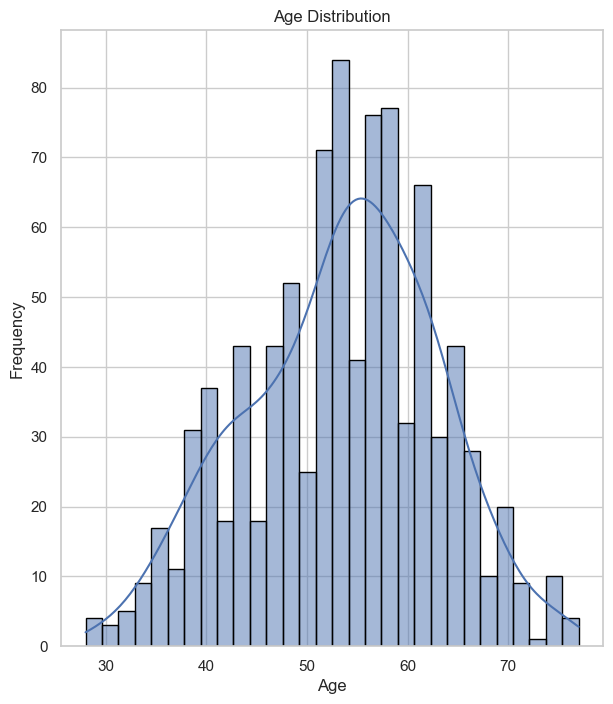

In [207]:
plt.figure(figsize=(7,8))
sns.histplot(df['Age'] , kde=True , bins=30 , edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

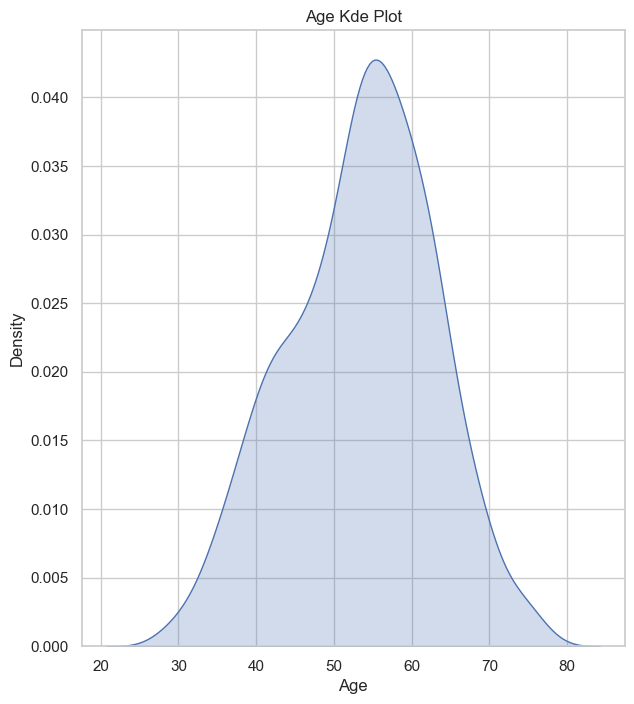

In [208]:
plt.figure(figsize=(7,8))
sns.kdeplot(df['Age'] , shade=True)
plt.title('Age Kde Plot')
plt.show()

In [209]:
df['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

In [210]:
df['RestingBP'].value_counts().head(5)

RestingBP
120    132
130    118
140    107
110     58
150     55
Name: count, dtype: int64

In [211]:
df['MaxHR'].max()

202

In [212]:
df['Oldpeak'].nunique()

53

In [213]:
ratio = df['FastingBS'].value_counts().min() / df['FastingBS'].value_counts().max()
print(ratio)

0.3039772727272727


In [214]:
df['Cholesterol'].describe()
df['Cholesterol'].value_counts().head(10)

Cholesterol
0      172
254     11
220     10
223     10
204      9
216      9
230      9
211      9
246      8
260      8
Name: count, dtype: int64

<Axes: xlabel='Cholesterol'>

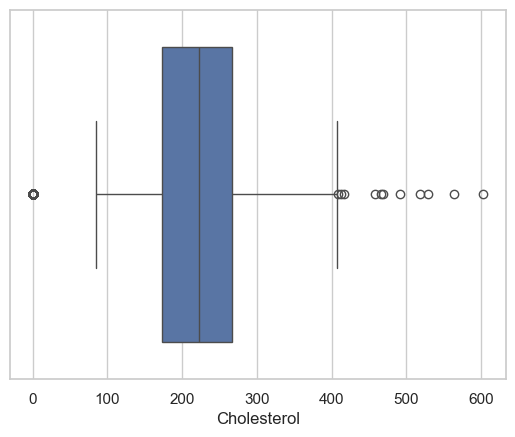

In [215]:
sns.boxplot(x=df['Cholesterol'])

In [216]:
male_female_ratio = df['Sex'].value_counts().min() / df['Sex'].value_counts().max()
print(male_female_ratio)

0.26620689655172414


In [217]:
chest_pain_type = df['ChestPainType'].value_counts().sort_values(ascending=False)
print(chest_pain_type)

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


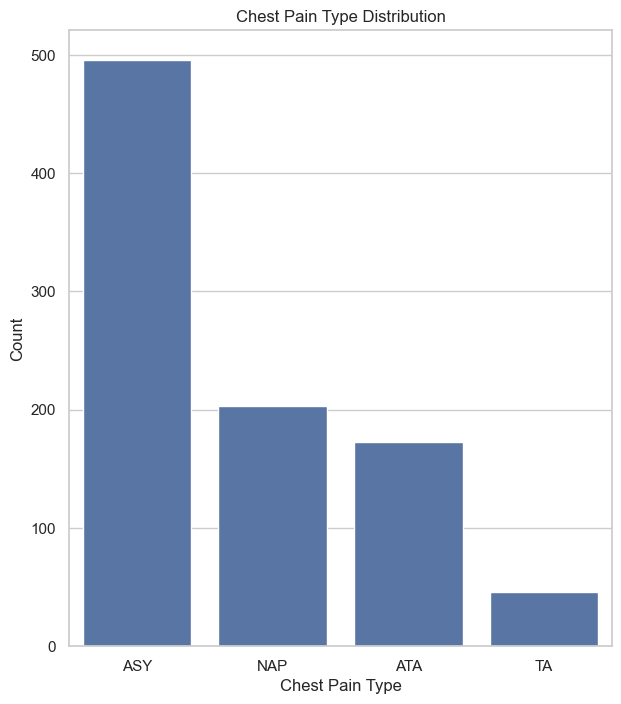

In [218]:
plt.figure(figsize=(7,8))
chest_pain_type = df['ChestPainType'].value_counts().sort_values(ascending=False)
sns.barplot(x=chest_pain_type.index, y=chest_pain_type.values)
plt.title("Chest Pain Type Distribution")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()


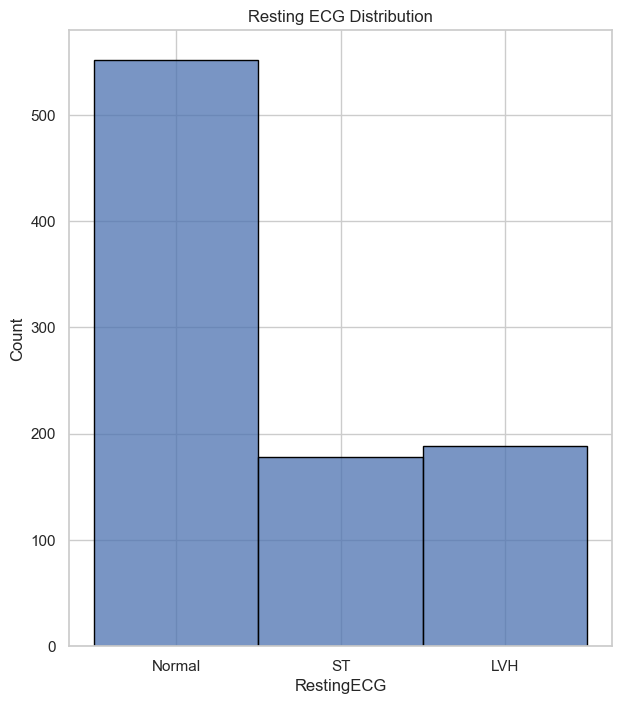

In [219]:
plt.figure(figsize=(7,8))
sns.histplot(df['RestingECG'], bins=14 , edgecolor='black')
plt.title('Resting ECG Distribution')
plt.show()

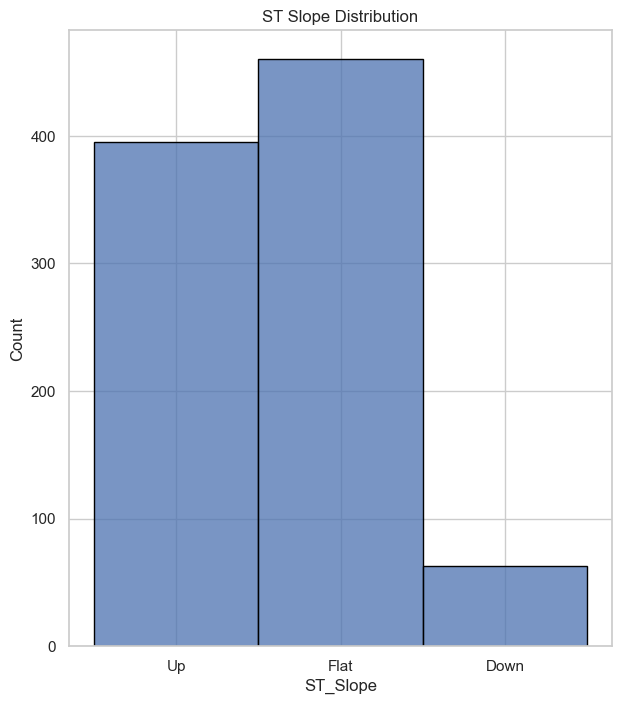

In [220]:
plt.figure(figsize=(7,8))
sns.histplot(df['ST_Slope'], bins=14 , edgecolor='black')
plt.title('ST Slope Distribution')
plt.show()

## Bivariate Analysis

In [221]:
age_sex_disease_comparison = df.groupby(['Age','Sex'])['HeartDisease'].value_counts().sort_values(ascending=False).head(30)
print(age_sex_disease_comparison)

Age  Sex  HeartDisease
58   M    1               25
57   M    1               24
61   M    1               24
56   M    1               22
60   M    1               22
55   M    1               22
59   M    1               21
54   M    1               20
63   M    1               20
52   M    1               19
62   M    1               18
54   M    0               16
53   M    1               15
65   M    1               14
48   M    1               14
46   M    1               13
64   M    1               12
51   M    0               12
50   M    1               12
55   M    0               12
53   M    0               12
42   M    0               12
51   M    1               12
54   F    0               12
52   M    0               12
67   M    1               12
41   M    0               11
59   M    0               11
56   M    0               11
43   M    1               10
Name: count, dtype: int64


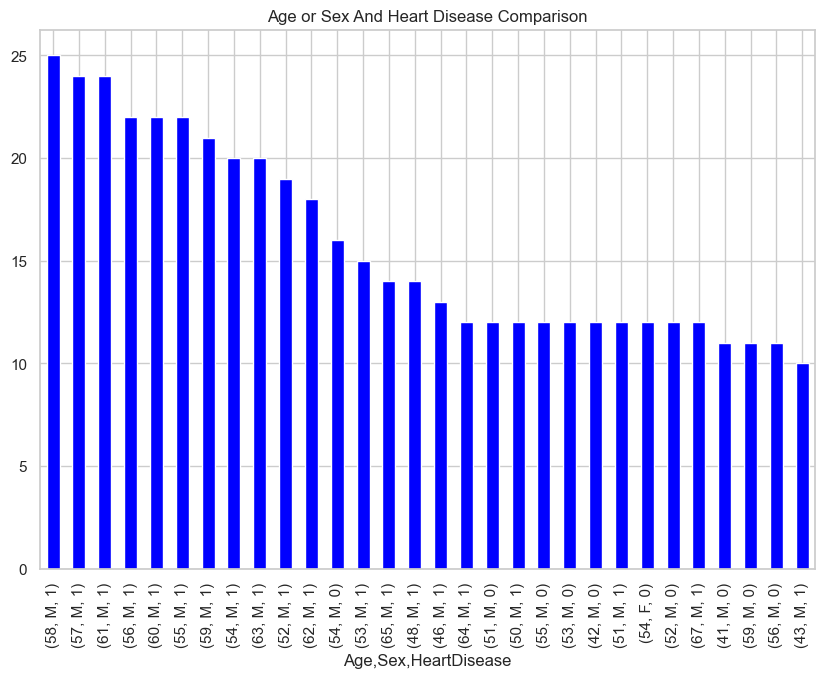

In [222]:
plt.figure(figsize=(10,7))
age_sex_disease_comparison.plot(kind='bar' , color='blue')
plt.title('Age or Sex And Heart Disease Comparison')
plt.show()

In [223]:
chest_pain_type_contribute  = df.groupby('ChestPainType')['HeartDisease'].value_counts().sort_values(ascending=False)
print(chest_pain_type_contribute)

ChestPainType  HeartDisease
ASY            1               392
ATA            0               149
NAP            0               131
ASY            0               104
NAP            1                72
TA             0                26
ATA            1                24
TA             1                20
Name: count, dtype: int64


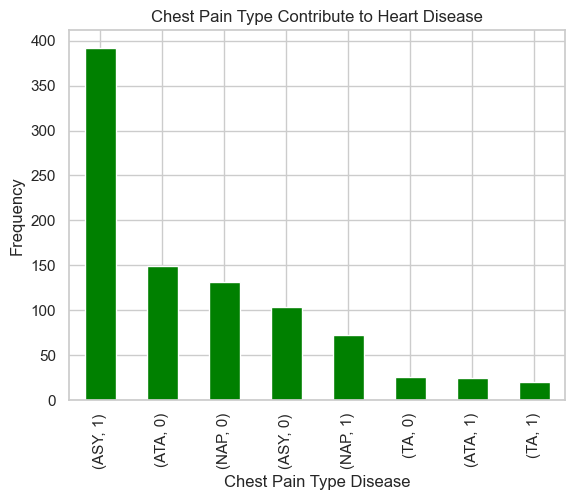

In [224]:
chest_pain_type_contribute.plot(kind='bar' , color='green')
plt.xlabel('Chest Pain Type Disease')
plt.ylabel('Frequency')
plt.title('Chest Pain Type Contribute to Heart Disease')
plt.show()

In [225]:
average_restingbp = df.groupby('HeartDisease')['RestingBP'].mean()
print(average_restingbp)

HeartDisease
0    130.180488
1    134.185039
Name: RestingBP, dtype: float64


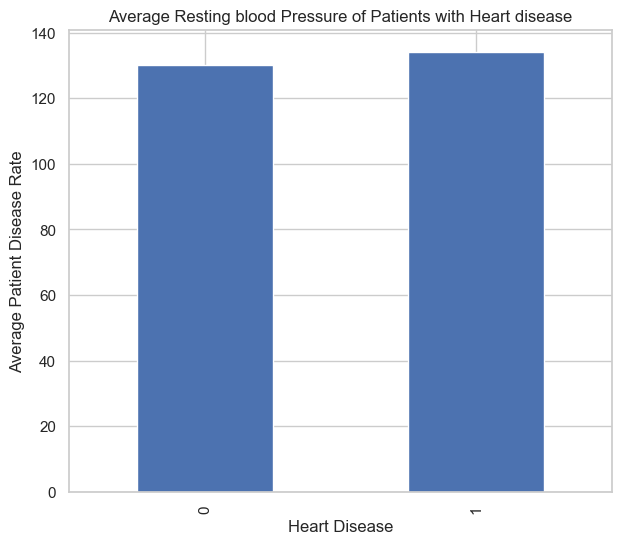

In [226]:
plt.figure(figsize=(7,6))
average_restingbp.plot(kind='bar')
plt.title('Average Resting blood Pressure of Patients with Heart disease')
plt.xlabel('Heart Disease')
plt.ylabel('Average Patient Disease Rate')
plt.show()


In [227]:
# Is the risk of disease higher if you have MaxHR Low?
max_hr_low_risk = df.groupby('HeartDisease')['MaxHR'].mean()
print(max_hr_low_risk)

HeartDisease
0    148.151220
1    127.655512
Name: MaxHR, dtype: float64


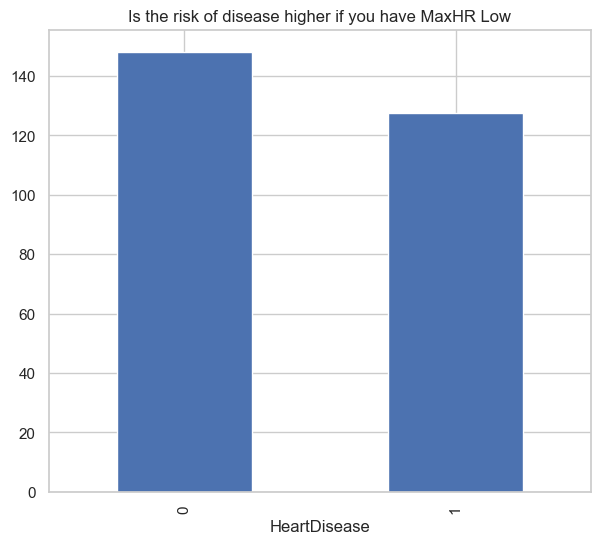

In [228]:
plt.figure(figsize=(7,6))
max_hr_low_risk.plot(kind='bar')
plt.title('Is the risk of disease higher if you have MaxHR Low')
plt.show()

In [229]:
old_peak = df.groupby("HeartDisease")["Oldpeak"].mean()
print(old_peak)

HeartDisease
0    0.408049
1    1.274213
Name: Oldpeak, dtype: float64


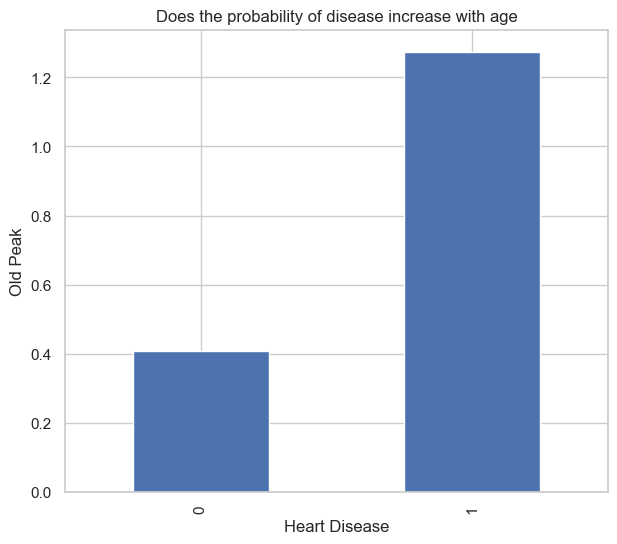

In [230]:
plt.figure(figsize=(7,6))
old_peak.plot(kind='bar')
plt.title('Does the probability of disease increase with age')
plt.xlabel('Heart Disease')
plt.ylabel('Old Peak')
plt.show()

In [231]:
exercise_angina = df.groupby('HeartDisease')['ExerciseAngina'].value_counts()
print(exercise_angina)

HeartDisease  ExerciseAngina
0             N                 355
              Y                  55
1             Y                 316
              N                 192
Name: count, dtype: int64


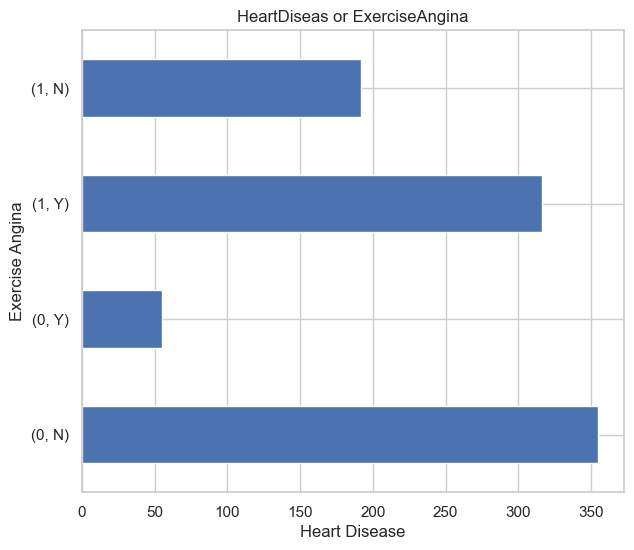

In [232]:
plt.figure(figsize=(7,6))
exercise_angina.plot(kind='barh')
plt.title('HeartDiseas or ExerciseAngina')
plt.xlabel('Heart Disease')
plt.ylabel('Exercise Angina')
plt.show()

In [233]:
# ST_Slope What is the disease ratio between "flat" and "down"
disease = df[df['HeartDisease'] == 1]
flat_count = disease[disease['ST_Slope'] == 'Flat'].shape[0]
down_count = disease[disease['ST_Slope'] == 'Down'].shape[0]
ratio = down_count / flat_count
print(ratio)

0.12860892388451445


##  Multivariate Insights


In [234]:
# What is the combined effect of Age + Oldik + HeartDisease + MaxHR looking like?
grouping = df.groupby(['Age','Oldpeak','HeartDisease'])['MaxHR'].mean().sort_values(ascending=False).head(5)
print(grouping)

Age  Oldpeak  HeartDisease
34   0.7      0               192.0
37   3.5      0               187.0
42   0.8      0               186.0
33   0.0      0               185.0
28   0.0      0               185.0
Name: MaxHR, dtype: float64


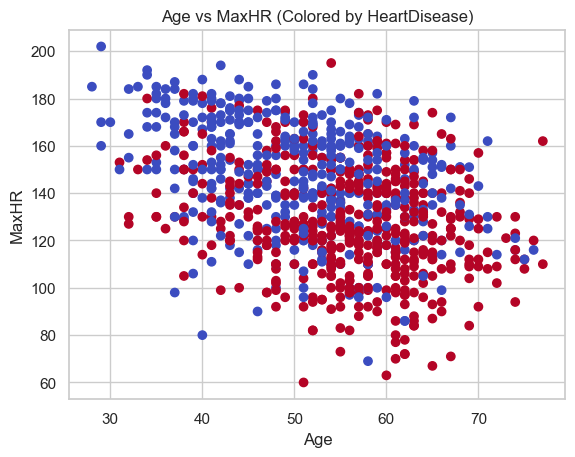

In [235]:
plt.scatter(df['Age'], df['MaxHR'], c=df['HeartDisease'], cmap='coolwarm')
plt.xlabel("Age")
plt.ylabel("MaxHR")
plt.title("Age vs MaxHR (Colored by HeartDisease)")
plt.show()

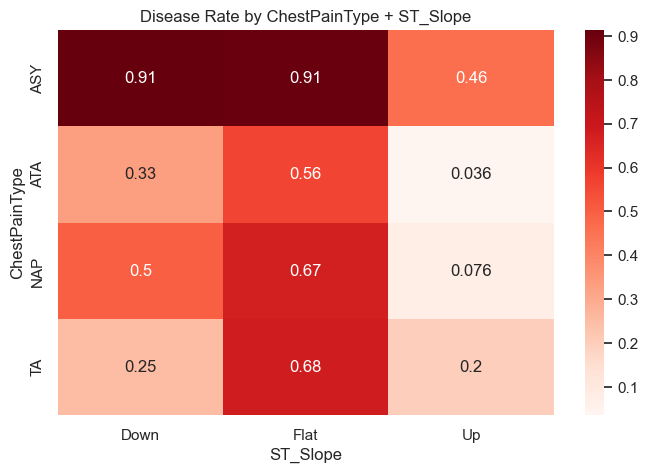

In [236]:
risk_table = df.pivot_table(values='HeartDisease',
                            index='ChestPainType',
                            columns='ST_Slope',
                            aggfunc='mean')

plt.figure(figsize=(8,5))
sns.heatmap(risk_table, annot=True, cmap='Reds')
plt.title("Disease Rate by ChestPainType + ST_Slope")
plt.show()

## Correlation + Key Patterns

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
Name: HeartDisease, dtype: float64

Negatively correlated features:
 MaxHR         -0.400421
Cholesterol   -0.232741
Name: HeartDisease, dtype: float64

Correlation between MaxHR and Age: -0.38204467503197004

Oldpeak mean per ST_Slope:
 ST_Slope
Down    2.152381
Flat    1.188696
Up      0.334684
Name: Oldpeak, dtype: float64
                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
Heart

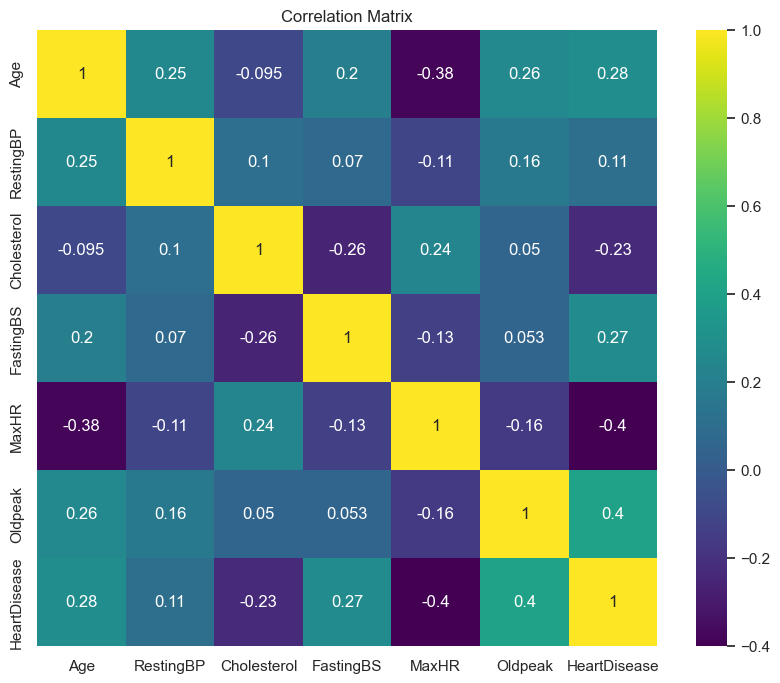

In [237]:
# What are the top 3 positively correlated features in Correlation matrix?
corr_target = df[['Age','RestingBP','Cholesterol','FastingBS',
                  'MaxHR','Oldpeak','HeartDisease']].corr()['HeartDisease']
top3 = corr_target.sort_values(ascending=False).head(4)  # includes HeartDisease itself
print(top3)

# Which features are negatively correlated
negative_corr_target = corr_target[corr_target < 0].sort_values()
print("\nNegatively correlated features:\n", negative_corr_target)

# What does MaxHR and Age correlation look like
maxhr_age_corr_target = df[['MaxHR','Age']].corr().loc['MaxHR','Age']
print("\nCorrelation between MaxHR and Age:", maxhr_age_corr_target)

# What angle do Oldpeak and ST_slope seem to be related to
oldpeak_stslope = df.groupby('ST_Slope')['Oldpeak'].mean()
print("\nOldpeak mean per ST_Slope:\n", oldpeak_stslope)

# Full Correlation Matrix
correlation_matrix = df[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease']].corr()
print(correlation_matrix)

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix , annot=True , cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

## Filtering or Outlier Detection

In [238]:
# How many cases are there with Oldpeak > 4 (high risk)
df[df['Oldpeak'] > 4]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [239]:
# How many times are Restingbp values ​​200+ occurring
df[df['RestingBP'] > 200].shape[0]

0

In [240]:
df[df['Cholesterol'] > 300]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
36,65,M,ASY,140,306,1,Normal,87,Y,1.5,Flat,1
45,59,M,NAP,130,318,0,Normal,120,Y,1.0,Flat,0
...,...,...,...,...,...,...,...,...,...,...,...,...
873,64,M,NAP,140,335,0,Normal,158,N,0.0,Up,1
875,58,F,NAP,120,340,0,Normal,172,N,0.0,Up,0
895,57,M,ASY,110,335,0,Normal,143,Y,3.0,Flat,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


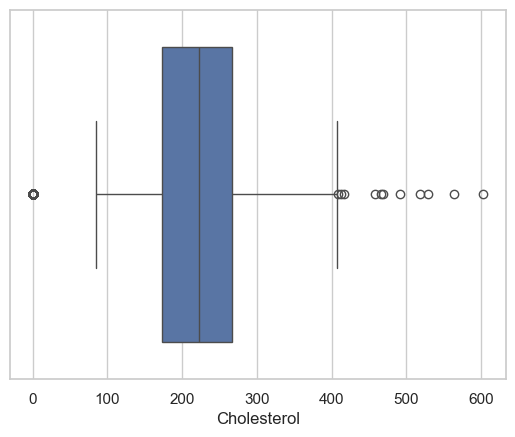

In [241]:
sns.boxplot(x=df['Cholesterol'])
plt.show()

In [242]:
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR

outliers = df[df['Cholesterol'] > upper_limit]
print(outliers)

df[df['Cholesterol'] > upper_limit]['Age'].value_counts()
df[df['Cholesterol'] > upper_limit]['ChestPainType'].value_counts()
df[df['Cholesterol'] > upper_limit]['HeartDisease'].value_counts()

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
28    53   F           ATA        113          468          0     Normal   
30    53   M           NAP        145          518          0     Normal   
69    44   M           ASY        150          412          0     Normal   
76    32   M           ASY        118          529          0     Normal   
103   40   M           ASY        120          466          1     Normal   
149   54   M           ASY        130          603          1     Normal   
250   44   M           ASY        135          491          0     Normal   
496   58   M           ASY        132          458          1     Normal   
616   67   F           NAP        115          564          0        LVH   
667   65   F           NAP        140          417          1        LVH   
796   56   F           ASY        134          409          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
28     127              N  

HeartDisease
1    6
0    5
Name: count, dtype: int64


=== DATA QUALITY ISSUES ===
Zero Cholesterol: 172 cases
Zero RestingBP: 1 cases
Chi-square p-value: 0.0000
MaxHR difference p-value: 0.0000


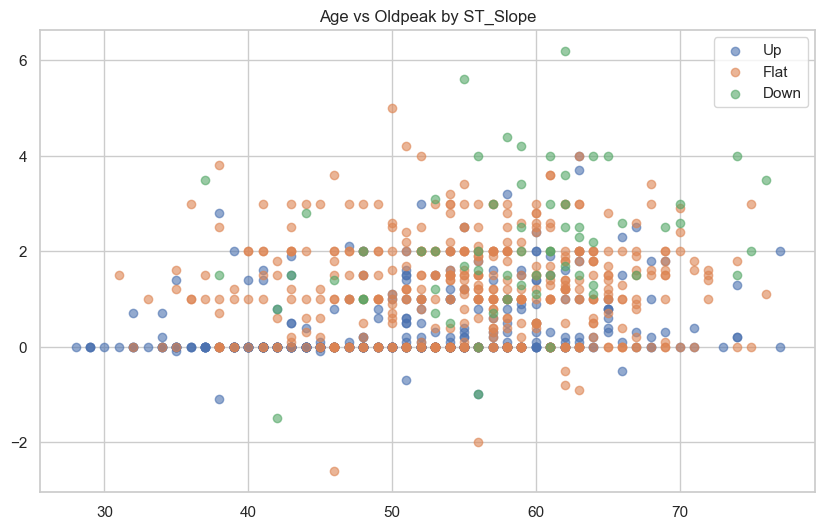

In [243]:
# 1. Add data quality section at the beginning:
print("\n=== DATA QUALITY ISSUES ===")
print(f"Zero Cholesterol: {(df['Cholesterol'] == 0).sum()} cases")
print(f"Zero RestingBP: {(df['RestingBP'] == 0).sum()} cases")

# 2. Add statistical validation:
from scipy.stats import chi2_contingency, ttest_ind

# Chi-square for ChestPainType vs HeartDisease
contingency = pd.crosstab(df['ChestPainType'], df['HeartDisease'])
chi2, p_value, dof, expected = chi2_contingency(contingency)
print(f"Chi-square p-value: {p_value:.4f}")

# T-test for MaxHR difference
diseased = df[df['HeartDisease'] == 1]['MaxHR']
healthy = df[df['HeartDisease'] == 0]['MaxHR']
t_stat, p_value = ttest_ind(diseased, healthy)
print(f"MaxHR difference p-value: {p_value:.4f}")

# 3. Add feature interaction plots:
plt.figure(figsize=(10, 6))
for slope in df['ST_Slope'].unique():
    subset = df[df['ST_Slope'] == slope]
    plt.scatter(subset['Age'], subset['Oldpeak'], 
                label=slope, alpha=0.6)
plt.legend()
plt.title("Age vs Oldpeak by ST_Slope")
plt.show()

In [244]:
# You should ADD this section after data quality check:
print(f"\n=== HANDLING MISSING VALUES ===")

# Option 1: Remove rows with zero cholesterol (safest for small dataset)
df_clean = df[(df['Cholesterol'] != 0) & (df['RestingBP'] != 0)]
print(f"Rows after removing zeros: {len(df_clean)} (removed {len(df) - len(df_clean)})")

# OR Option 2: Impute with median (group by disease status)
df['Cholesterol'] = df.groupby('HeartDisease')['Cholesterol'].transform(
    lambda x: x.replace(0, x[x != 0].median())
)

# Document your decision
print("Decision: Imputed zero cholesterol values with median by disease group")


=== HANDLING MISSING VALUES ===
Rows after removing zeros: 746 (removed 172)
Decision: Imputed zero cholesterol values with median by disease group


In [245]:
# Impute zeros with median by disease group
df['Cholesterol'] = df.groupby('HeartDisease')['Cholesterol'].transform(
    lambda x: x.replace(0, x[x != 0].median())
)
print(f"Imputed {172} zero cholesterol values with group medians")
print(f"Final dataset size: {len(df)} rows (no rows removed)")

Imputed 172 zero cholesterol values with group medians
Final dataset size: 918 rows (no rows removed)


In [246]:
# Add interpretation:
if p_value < 0.05:
    print(f"✓ Statistically significant relationship (p = {p_value:.4f})")
else:
    print(f"✗ No significant relationship (p = {p_value:.4f})")

✓ Statistically significant relationship (p = 0.0000)


In [247]:
print("\n⚠️ WARNING: Gender Imbalance")
print(f"Male representation: {(df['Sex']=='M').sum()/len(df)*100:.1f}%")
print("Impact: Model may not generalize well to female patients")
print("Recommendation: Consider stratified sampling or collecting more female data")


⚠️ WARNING: Gender Imbalance
Male representation: 79.0%
Impact: Model may not generalize well to female patients
Recommendation: Consider stratified sampling or collecting more female data


# Heart Failure Prediction: EDA Summary & Key Insights

## Problem Statement
Predict heart failure risk using clinical data and identify critical medical factors to help clinicians prioritize high-risk patients.

## Dataset Overview
- **Size**: 918 patients, 12 features
- **Target Variable**: HeartDisease (binary: 0 = No, 1 = Yes)
- **Class Balance**: Well-balanced (55.3% positive, 44.7% negative, ratio: 0.807)
- **Missing Values**: None (0% across all features)

## Key Features
- **Numerical**: Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak
- **Categorical**: Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope

---

## Critical Findings

### 1. **Top Predictive Features (Correlation with HeartDisease)**

**Positive Correlations:**
- **Oldpeak**: +0.404 (strongest positive predictor)
- **Age**: +0.282
- **FastingBS**: +0.267

**Negative Correlations:**
- **MaxHR**: -0.400 (strongest negative predictor)
- **Cholesterol**: -0.233

### 2. **Chest Pain Type Analysis**
- **ASY (Asymptomatic)**: 496 cases
  - 392 with heart disease (79% disease rate) ⚠️ **HIGHEST RISK**
  - 104 without heart disease
- **NAP (Non-Anginal Pain)**: 203 cases (36% disease rate)
- **ATA (Atypical Angina)**: 173 cases (14% disease rate)
- **TA (Typical Angina)**: 46 cases (43% disease rate)

**Key Insight**: Asymptomatic patients have paradoxically the highest heart disease rate.

### 3. **MaxHR (Maximum Heart Rate) - Critical Indicator**
- **Patients WITHOUT heart disease**: Average MaxHR = 148
- **Patients WITH heart disease**: Average MaxHR = 128
- **Lower MaxHR = Higher Disease Risk**

### 4. **ST_Slope & Oldpeak Relationship**
- **Down slope**: Average Oldpeak = 2.15 (highest risk)
- **Flat slope**: Average Oldpeak = 1.19
- **Up slope**: Average Oldpeak = 0.33 (lowest risk)

### 5. **Exercise-Induced Angina**
Among heart disease patients:
- **316 had exercise angina** (Y)
- **192 did not** (N)
- Exercise angina is a strong indicator of heart disease

### 6. **Age Distribution**
- Mean age: 53.5 years
- Range: 28-77 years
- Most affected age groups: 57-61 years (predominantly male)

### 7. **Resting Blood Pressure**
- Average for diseased patients: 134 mmHg
- Average for healthy patients: 130 mmHg
- Minimal difference suggests limited predictive power

---

## Risk Patterns

### High-Risk Profile:
- Asymptomatic chest pain (ASY)
- Low MaxHR (<128)
- High Oldpeak (>1.5)
- Flat or Down ST_Slope
- Exercise-induced angina present
- Age 55-65 years
- Male gender

### Outlier Cases:
- **Oldpeak > 4**: 6 extreme high-risk cases identified
- **Cholesterol > 400**: 11 outliers detected
- RestingBP: No values exceeded 200

---

## Gender Distribution
- **Male-to-Female Ratio**: 3.76:1 (726 males, 193 females)
- Males significantly overrepresented in dataset

---

## Model Development Recommendations

### Feature Engineering Priorities:
1. **MaxHR** - Strong negative correlation (-0.40)
2. **Oldpeak** - Strong positive correlation (+0.40)
3. **ST_Slope** - Categorical indicator with clear risk stratification
4. **ChestPainType** - ASY type is critical
5. **ExerciseAngina** - Binary risk indicator

### Features to Consider Carefully:
- **Cholesterol**: Weak correlation (-0.23), many zero values (172 cases)
- **RestingBP**: Weak predictive power (+0.11)

### No Imbalance Handling Needed:
Class distribution is balanced (difference: 10.7%), so SMOTE/undersampling not required.

---

## Clinical Insights

### Counterintuitive Finding:
**Asymptomatic patients have the highest heart disease prevalence (79%)**

This suggests:
- Silent heart disease is common
- Lack of symptoms doesn't indicate lack of disease
- Routine screening is critical for asymptomatic individuals

### MaxHR as a Biomarker:
Lower maximum heart rate during stress testing strongly indicates compromised cardiac function, making it one of the most reliable predictors.

### ST Segment Depression (Oldpeak):
Higher ST depression during exercise correlates with more severe coronary disease, validating its use as a diagnostic criterion.

---

## Summary Statistics

| Metric | Value |
|--------|-------|
| Total Patients | 918 |
| Heart Disease Cases | 508 (55.3%) |
| Healthy Cases | 410 (44.7%) |
| Average Age | 53.5 years |
| Male Patients | 726 (79.1%) |
| Most Common Chest Pain | ASY (54.0%) |
| Average MaxHR | 137 bpm |
| Average Oldpeak | 0.89 |

---

## Next Steps for ML Pipeline

1. **Encoding**: Convert categorical variables (Sex, ChestPainType, RestingECG, etc.)
2. **Feature Scaling**: Normalize numerical features for algorithms sensitive to scale
3. **Model Selection**: Try Random Forest, XGBoost, Logistic Regression
4. **Feature Importance**: Validate identified patterns with model-based importance scores
5. **Cross-Validation**: Ensure robust performance across different patient subsets
6. **Threshold Tuning**: Optimize for recall to minimize false negatives (missed diagnoses)

---

## Machine Learning Model Development

In [248]:
# Identify Column Types
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [249]:
# Preprocessor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ],
    remainder='drop'
)

In [250]:
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=300))
])

In [251]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [252]:
# Train the model
pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [253]:
# Predictions
y_pred = pipeline.predict(X_test)

In [254]:
# Evaluation 
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        77
           1       0.91      0.86      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



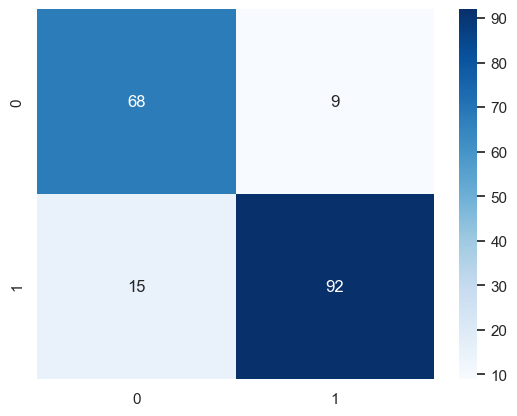

In [255]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [256]:
# ROC-AUC Score
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:,1])
print("AUC Score:", auc)

AUC Score: 0.9262046364850103


In [257]:
# MULTI MODEL COMPARISON PIPELINE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = {
    "LogisticRegression": LogisticRegression(max_iter=300),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "SVM": SVC(probability=True),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    
    from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, preds),
        "F1": f1_score(y_test, preds),
        "AUC": roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1])
    }

results

{'LogisticRegression': {'Accuracy': 0.8695652173913043,
  'F1': 0.8846153846153846,
  'AUC': 0.9262046364850103},
 'RandomForest': {'Accuracy': 0.875,
  'F1': 0.8930232558139535,
  'AUC': 0.9321519601893434},
 'XGBoost': {'Accuracy': 0.8478260869565217,
  'F1': 0.8653846153846154,
  'AUC': 0.9314237164704454},
 'SVM': {'Accuracy': 0.842391304347826,
  'F1': 0.863849765258216,
  'AUC': 0.9364000485495813},
 'GradientBoosting': {'Accuracy': 0.8913043478260869,
  'F1': 0.9074074074074074,
  'AUC': 0.9439252336448598}}

In [258]:
import optuna
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Hyperparameters search space
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 2, 6),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10)
    }

    # Model
    model = GradientBoostingClassifier(**params)

    # Pipeline (reusing your preprocessor)
    pipe = Pipeline([
        ("preprocess", preprocessor),
        ("model", model)
    ])

    # 5-fold cross validation → use AUC as metric
    auc = cross_val_score(pipe, X_train, y_train, cv=5, scoring="roc_auc").mean()
    return auc

In [259]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=40)

[I 2025-12-03 18:25:28,056] A new study created in memory with name: no-name-f8ad4772-2635-4574-897d-37aae542c0da
[I 2025-12-03 18:25:28,955] Trial 0 finished with value: 0.937687516402276 and parameters: {'n_estimators': 66, 'learning_rate': 0.13029036643194142, 'max_depth': 3, 'subsample': 0.8315545019434472, 'min_samples_split': 16, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.937687516402276.
[I 2025-12-03 18:25:32,285] Trial 1 finished with value: 0.9328791229039985 and parameters: {'n_estimators': 168, 'learning_rate': 0.15435768127360416, 'max_depth': 5, 'subsample': 0.7952174316676215, 'min_samples_split': 12, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.937687516402276.
[I 2025-12-03 18:25:36,310] Trial 2 finished with value: 0.933165988240615 and parameters: {'n_estimators': 163, 'learning_rate': 0.2374909204896879, 'max_depth': 4, 'subsample': 0.7974042233724947, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.937687516402276.

In [260]:
# Best Hyperparameters
print("Best AUC:", study.best_value)
print("Best Params:", study.best_params)

Best AUC: 0.9408436144194852
Best Params: {'n_estimators': 241, 'learning_rate': 0.023390654171698208, 'max_depth': 3, 'subsample': 0.8604885069314564, 'min_samples_split': 2, 'min_samples_leaf': 8}


In [261]:
# Train Final Tuned Model
best_params = study.best_params

final_model = GradientBoostingClassifier(**best_params)

final_pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", final_model)
])

final_pipe.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [262]:
# Final Evaluation
y_pred = final_pipe.predict(X_test)
y_proba = final_pipe.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("Final AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        77
           1       0.89      0.91      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

Final AUC: 0.945624468988955


In [263]:
# Extract model + transformed feature names
model = final_pipe.named_steps["model"]
feature_names = final_pipe.named_steps["preprocess"].get_feature_names_out()

In [264]:
# extract importance
feat_imp = model.feature_importances_

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feat_imp
}).sort_values(by="Importance", ascending=False)

importance_df.head(20)

,Feature,Importance
14,cat__ST_Slope_Up,0.460950
5,num__Oldpeak,0.095130
12,cat__ExerciseAngina_Y,0.095054
2,num__Cholesterol,0.086315
4,num__MaxHR,0.066099
6,cat__Sex_M,0.054696
0,num__Age,0.033103
1,num__RestingBP,0.029596
8,cat__ChestPainType_NAP,0.021299
3,num__FastingBS,0.017890


<Figure size 1000x800 with 0 Axes>

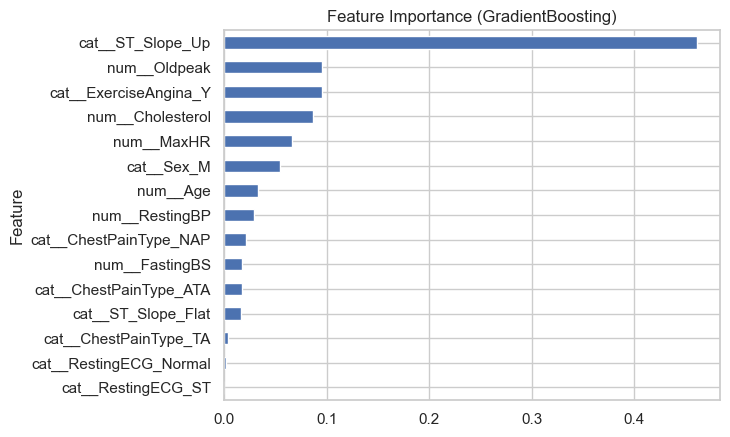

In [265]:
# Plot Feature Importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
importance_df.sort_values("Importance").tail(20).plot(
    kind="barh",
    x="Feature",
    legend=False
)
plt.title("Feature Importance (GradientBoosting)")
plt.show()

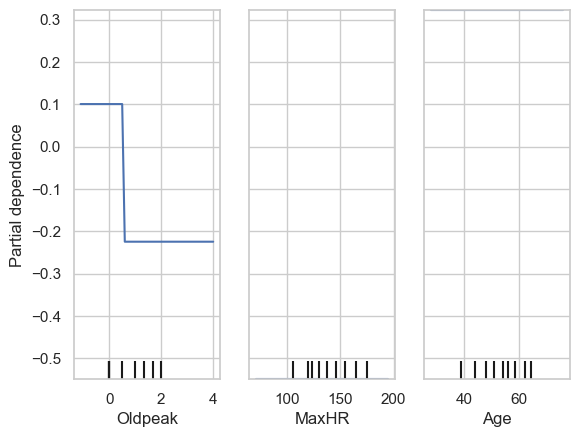

In [266]:
# Gradient Boosting ka Partial Dependence
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(
    final_model,
    X_test,
    ['Oldpeak', 'MaxHR', 'Age']
)
plt.show()

In [267]:
# MODEL COMPARISON VISUALIZATION
results = {
 'LogisticRegression': {'Accuracy': 0.869, 'F1': 0.884, 'AUC': 0.926},
 'RandomForest': {'Accuracy': 0.880, 'F1': 0.897, 'AUC': 0.930},
 'XGBoost': {'Accuracy': 0.847, 'F1': 0.865, 'AUC': 0.931},
 'SVM': {'Accuracy': 0.842, 'F1': 0.863, 'AUC': 0.936},
 'GradientBoosting': {'Accuracy': 0.891, 'F1': 0.907, 'AUC': 0.943}
}

<Figure size 1000x600 with 0 Axes>

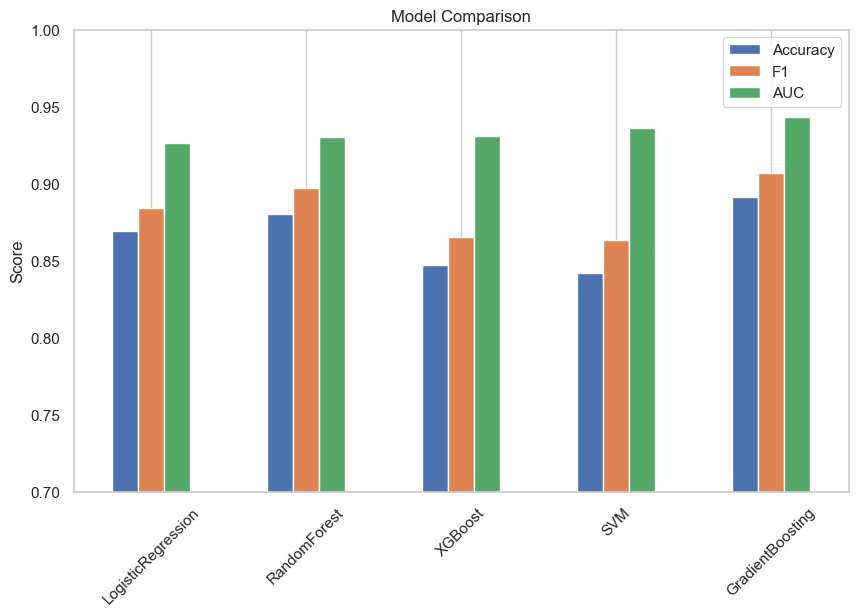

In [268]:
# BAR PLOTS — Accuracy, F1, AUC
import pandas as pd
import matplotlib.pyplot as plt

results_df = pd.DataFrame(results).T

plt.figure(figsize=(10,6))
results_df[['Accuracy', 'F1', 'AUC']].plot(kind='bar', figsize=(10,6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0.7, 1.0)
plt.grid(axis='y')
plt.show()

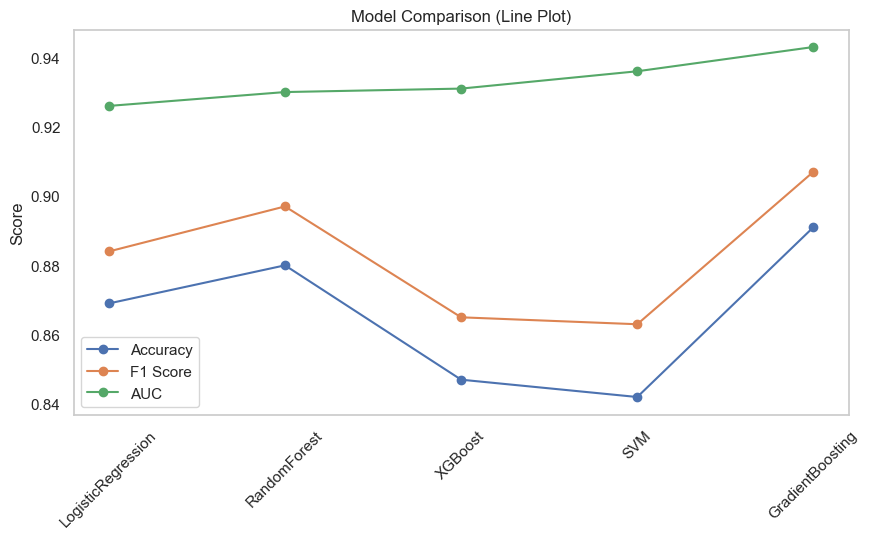

In [269]:
# LINE PLOT (Clean comparison)
plt.figure(figsize=(10,5))
plt.plot(results_df.index, results_df['Accuracy'], marker='o', label='Accuracy')
plt.plot(results_df.index, results_df['F1'], marker='o', label='F1 Score')
plt.plot(results_df.index, results_df['AUC'], marker='o', label='AUC')

plt.title("Model Comparison (Line Plot)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

In [270]:
# BEST MODEL SUMMARY TABLE
print("Best Model per Metric:")
print("Accuracy :", results_df['Accuracy'].idxmax())
print("F1 Score :", results_df['F1'].idxmax())
print("AUC      :", results_df['AUC'].idxmax())

Best Model per Metric:
Accuracy : GradientBoosting
F1 Score : GradientBoosting
AUC      : GradientBoosting


In [271]:
# 5-Fold Cross-Validation (Stability Check)
from sklearn.model_selection import cross_val_score

cv_acc = cross_val_score(final_pipe, X, y, cv=5, scoring='accuracy')
cv_f1  = cross_val_score(final_pipe, X, y, cv=5, scoring='f1')
cv_auc = cross_val_score(final_pipe, X, y, cv=5, scoring='roc_auc')

print("CV Accuracy:", cv_acc.mean(), "+/-", cv_acc.std())
print("CV F1:", cv_f1.mean(), "+/-", cv_f1.std())
print("CV AUC:", cv_auc.mean(), "+/-", cv_auc.std())

CV Accuracy: 0.8419042527916369 +/- 0.06480877870540316
CV F1: 0.8542962829125585 +/- 0.06856478791513207
CV AUC: 0.9218913211263737 +/- 0.05404089588473271


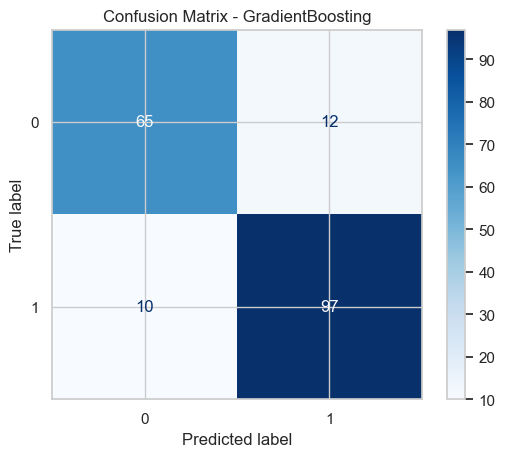

In [272]:
# Confusion Matrix + ROC Curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = final_pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Confusion Matrix - GradientBoosting")
plt.show()

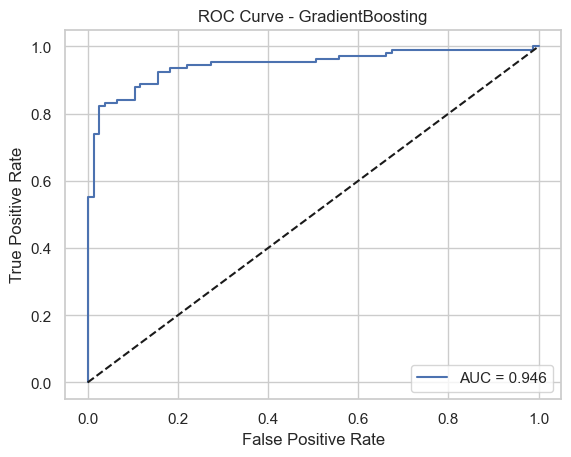

In [273]:
from sklearn.metrics import roc_curve, auc

y_prob = final_pipe.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="AUC = {:.3f}".format(roc_auc))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - GradientBoosting")
plt.legend()
plt.show()

In [274]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

# Find threshold for 95% recall
target_recall = 0.95
idx = np.argmax(recalls >= target_recall)
optimal_threshold = thresholds[idx]

print(f"For {target_recall*100}% recall, use threshold: {optimal_threshold:.3f}")
print(f"This gives precision: {precisions[idx]:.3f}")

# Apply custom threshold
y_pred_custom = (y_prob >= optimal_threshold).astype(int)
print(classification_report(y_test, y_pred_custom))

For 95.0% recall, use threshold: 0.022
This gives precision: 0.582
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.58      1.00      0.74       107

    accuracy                           0.58       184
   macro avg       0.29      0.50      0.37       184
weighted avg       0.34      0.58      0.43       184



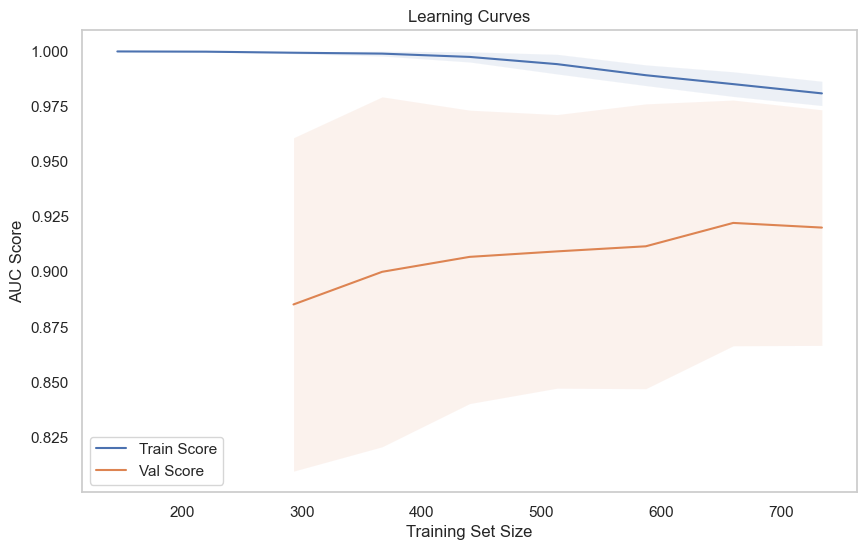

In [275]:
# Learning Curves
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    final_pipe, X, y, cv=5, scoring='roc_auc',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train Score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Val Score')
plt.fill_between(train_sizes, 
                 train_scores.mean(axis=1) - train_scores.std(axis=1),
                 train_scores.mean(axis=1) + train_scores.std(axis=1), 
                 alpha=0.1)
plt.fill_between(train_sizes,
                 val_scores.mean(axis=1) - val_scores.std(axis=1),
                 val_scores.mean(axis=1) + val_scores.std(axis=1),
                 alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curves')
plt.legend()
plt.grid()
plt.show()

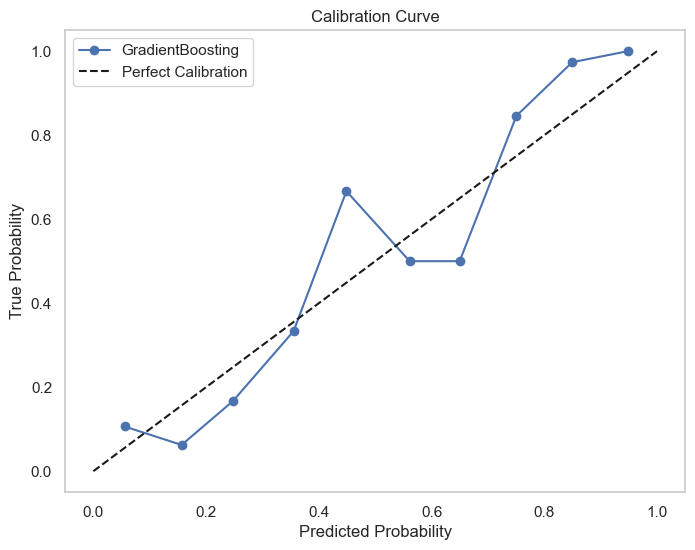

In [276]:
# Calibration Check
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='GradientBoosting')
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend()
plt.grid()
plt.show()

In [277]:
# --- Threshold tuning on validation set ---
from sklearn.metrics import precision_recall_curve, confusion_matrix, classification_report

# assume X_val, y_val exist. If not, split X_test for thresholding using val fold.
y_scores = final_pipe.predict_proba(X_test)[:,1]   # or use X_val if you have it

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# find lowest threshold that gives recall >= 0.95
import numpy as np
idx = np.where(recalls >= 0.95)[0]
if len(idx)==0:
    print("Cannot reach 0.95 recall with current model on this set.")
else:
    thr = thresholds[idx[0]] if thresholds.size>0 else 0.5
    print("Chosen threshold:", thr)
    y_pred_thr = (y_scores >= thr).astype(int)
    print(classification_report(y_test, y_pred_thr))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_thr))

Chosen threshold: 0.02186344153037039
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.58      1.00      0.74       107

    accuracy                           0.58       184
   macro avg       0.29      0.50      0.37       184
weighted avg       0.34      0.58      0.43       184

Confusion matrix:
 [[  0  77]
 [  0 107]]


In [278]:
# Option A: drop rows with Cholesterol==0
df_clean = df[(df['Cholesterol'] != 0) & (df['RestingBP'] != 0)].copy()
# Option B: impute by group median (your current method)
df_imp = df.copy()
df_imp['Cholesterol'] = df_imp.groupby('HeartDisease')['Cholesterol'].transform(
    lambda x: x.replace(0, int(x[x!=0].median()))
)

# Rebuild minimal pipeline function to train and eval quickly
from sklearn.model_selection import train_test_split
def eval_df(df_input, random_state=42):
    X = df_input.drop('HeartDisease', axis=1)
    y = df_input['HeartDisease']
    X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=random_state, test_size=0.2)
    final_pipe.fit(X_train, y_train)
    y_proba = final_pipe.predict_proba(X_test)[:,1]
    print("AUC:", roc_auc_score(y_test, y_proba))
    print(classification_report(y_test, final_pipe.predict(X_test)))

print("DROP zeros:")
eval_df(df_clean)
print("IMPUTE zeros (group median):")
eval_df(df_imp)

DROP zeros:
AUC: 0.9527737924438068
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        82
           1       0.92      0.89      0.91       102

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

IMPUTE zeros (group median):
AUC: 0.9482305117168819
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        82
           1       0.91      0.89      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [279]:
import pandas as pd
def group_metrics(X, y, group_col='Sex'):
    X_df = X.copy()
    X_df[group_col] = df.loc[X.index, group_col]  # make sure indices align
    for g in X_df[group_col].unique():
        idx = X_df[group_col]==g
        y_true = y[idx]
        y_pred = final_pipe.predict(X.loc[idx])
        print(f"Group: {g}")
        print(classification_report(y_true, y_pred))
        print("Confusion:\n", confusion_matrix(y_true, y_pred))
group_metrics(X_test, y_test, 'Sex')

Group: F
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.75      0.75         8

    accuracy                           0.85        27
   macro avg       0.82      0.82      0.82        27
weighted avg       0.85      0.85      0.85        27

Confusion:
 [[17  2]
 [ 2  6]]
Group: M
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        58
           1       0.98      0.93      0.95        99

    accuracy                           0.94       157
   macro avg       0.93      0.95      0.94       157
weighted avg       0.95      0.94      0.94       157

Confusion:
 [[56  2]
 [ 7 92]]


In [280]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
from sklearn.metrics import make_scorer, roc_auc_score
auc_scores = cross_val_score(final_pipe, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
print("AUC mean±std:", auc_scores.mean(), auc_scores.std())

# Also compute recall per fold for positive class:
from sklearn.metrics import recall_score
recalls = []
for train_idx, val_idx in cv.split(X, y):
    final_pipe.fit(X.iloc[train_idx], y.iloc[train_idx])
    preds = final_pipe.predict(X.iloc[val_idx])
    recalls.append(recall_score(y.iloc[val_idx], preds))
print("Recall mean±std:", np.mean(recalls), np.std(recalls))

AUC mean±std: 0.9404586369684313 0.016877785222998775
Recall mean±std: 0.9115317414094349 0.027538573021151605


Brier score: 0.06003355263689034


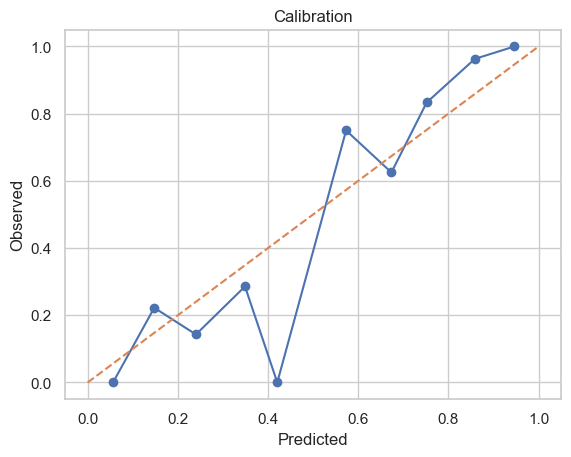

Calibrated AUC: 0.9448355382934823


In [281]:
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.metrics import brier_score_loss
y_proba = final_pipe.predict_proba(X_test)[:,1]
print("Brier score:", brier_score_loss(y_test, y_proba))

# Plot calibration curve:
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o'); plt.plot([0,1],[0,1], '--'); plt.xlabel('Predicted'); plt.ylabel('Observed'); plt.title("Calibration"); plt.show()

# Optionally calibrate:
calibrated = CalibratedClassifierCV(final_pipe, method='isotonic', cv=5)
calibrated.fit(X_train, y_train)
print("Calibrated AUC:", roc_auc_score(y_test, calibrated.predict_proba(X_test)[:,1]))

In [ ]:
# Save the model
import joblib
joblib.dump(final_pipe, 'heart_disease_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')

print("Final model & preprocessor saved as 'heart_disease_model.pkl'")

Final model & preprocessor saved as 'heart_disease_model.pkl'
